## Задание
Ввиду сложности возникшей аварийной ситуации в электрической сети на ее устранение были направлены
оперативно-выездная бригада и две ремонтные бригады электромонтеров. Интенсивность потока отключений электрической
сети λ = 0,2, среднее время подготовки к ремонту tподг = [0,5, 4] ч, среднее время ремонта tобсл = [1, 5] ч.
Определить вероятности состояний и показатели эффективности СМО, построить графики Q, A, kзан.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Параметры системы
num_channels = 3  # Количество каналов
arrival_rate = 0.2  # Интенсивность потока

In [3]:
# Создание сетки значений времени подготовки и обслуживания
t_prep, t_serv = np.meshgrid(np.linspace(0.5, 4, 100), np.linspace(1, 5, 100))

# Вычисление интенсивностей обслуживания
mu1 = 1 / t_prep
mu2 = 1 / t_serv
mu = mu2 * mu1 / (mu1 + mu2)

# Расчёт коэффициента загрузки
y = arrival_rate / mu

# Вероятности состояния системы
prob_p0 = (1 + y / 1 + y ** 2 / 2) ** (-1)
block_probability = y ** 2 / 2 * prob_p0

# Основные параметры
throughput_ratio = 1 - block_probability
effective_arrival_rate = arrival_rate * throughput_ratio
avg_busy_channels = effective_arrival_rate / mu

In [4]:
# Подготовка данных для графиков
parameters = {
    'Относительная пропускная способность': ('Q', throughput_ratio),
    'Абсолютная пропускная способность': ('A', effective_arrival_rate),
    'Среднее число занятых каналов': ('k_зан', avg_busy_channels)
}

cmaps = ['viridis', 'plasma', 'cividis']

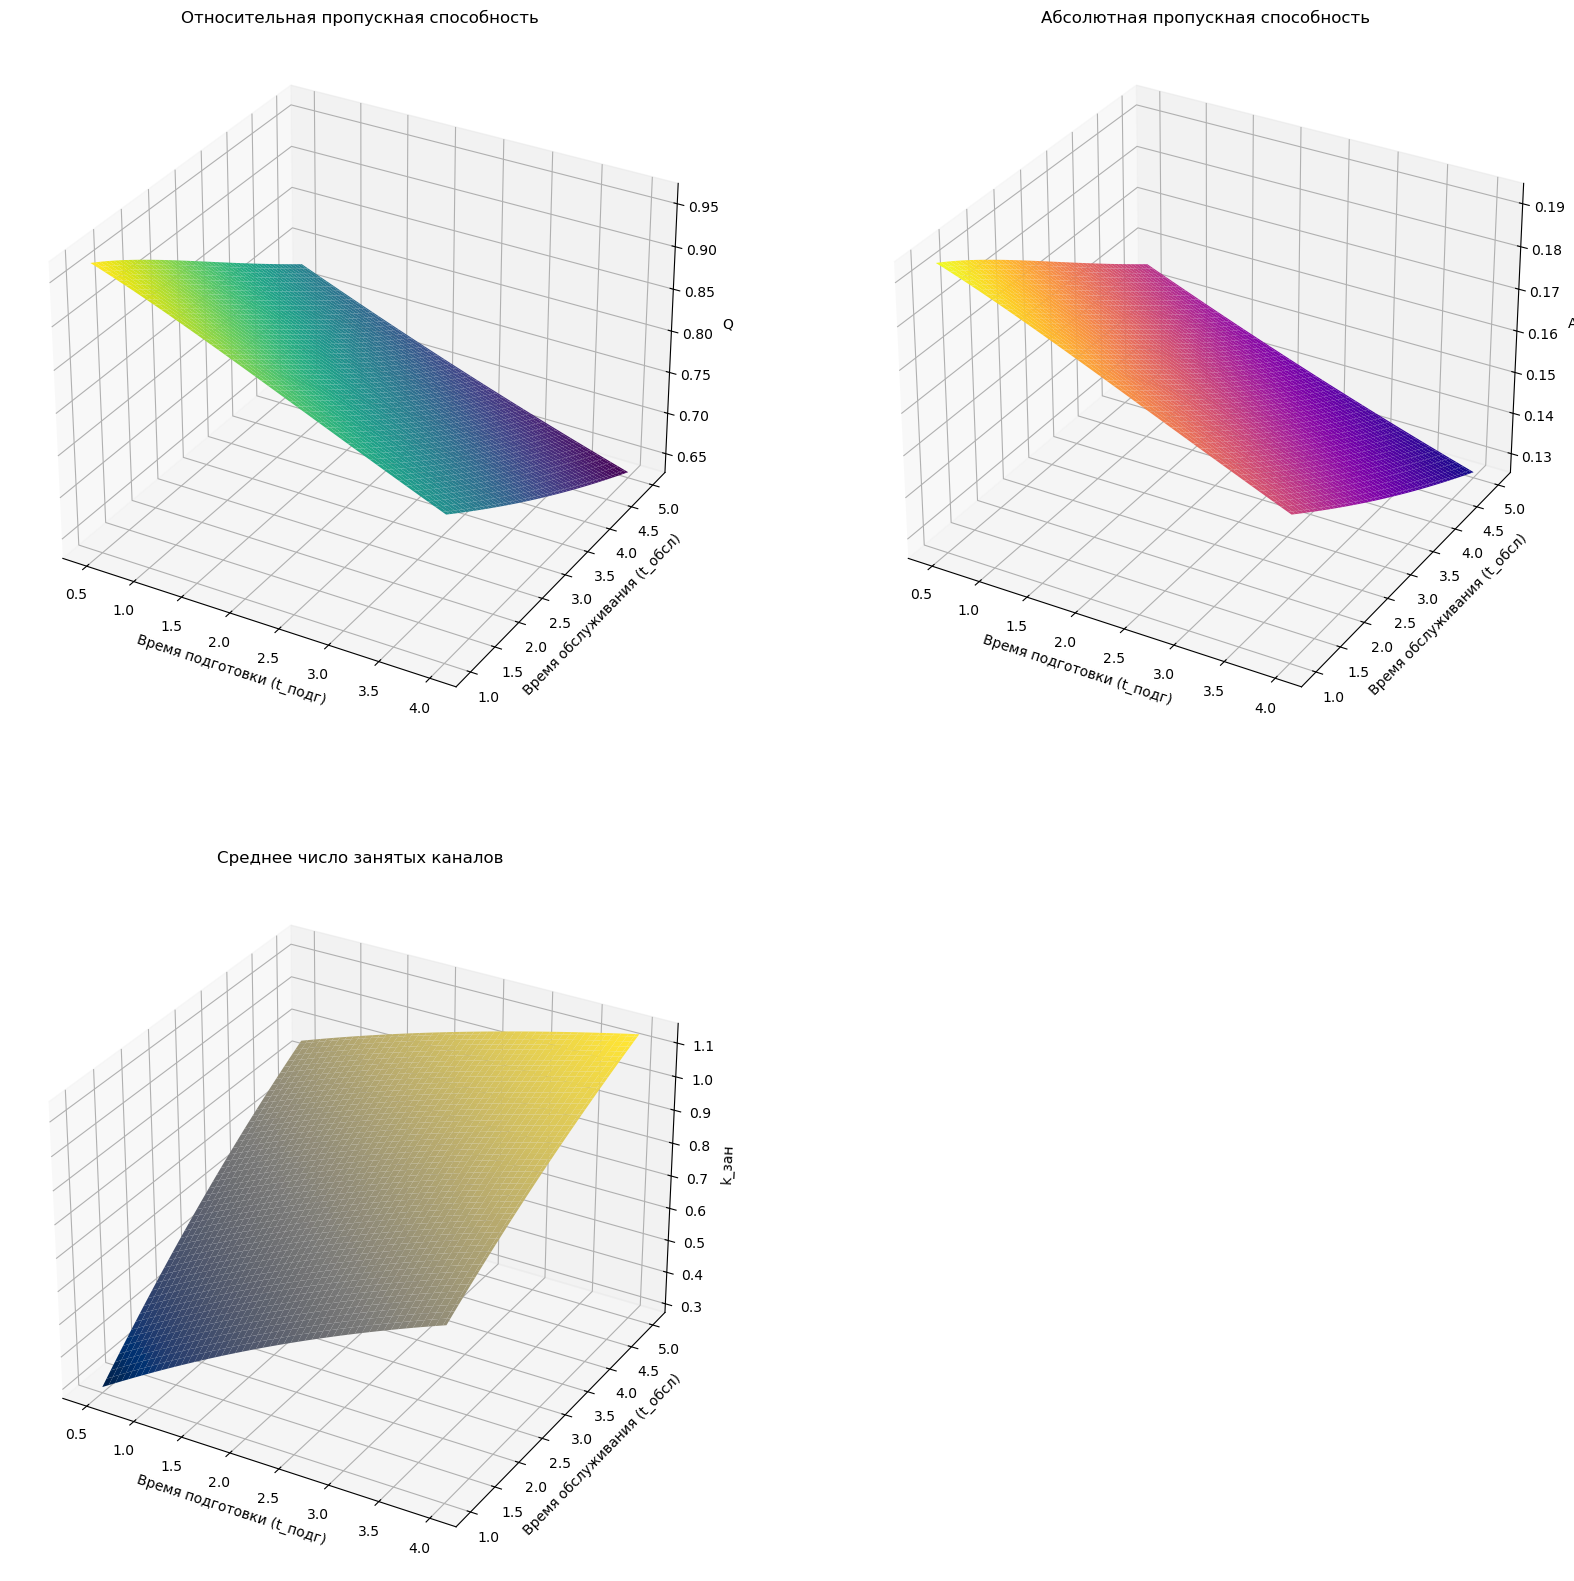

In [11]:
# Создание 3D графиков для каждого параметра
fig, axes = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': '3d'})

# Визуализация параметров
for i, (name, (label, value)) in enumerate(parameters.items()):
    ax = axes[i // 2][i % 2]
    ax.plot_surface(t_prep, t_serv, value, cmap=cmaps[i % len(cmaps)])
    ax.set_title(name)
    ax.set_xlabel('Время подготовки (t_подг)')
    ax.set_ylabel('Время обслуживания (t_обсл)')
    ax.set_zlabel(label)
    
axes[1,1].axis('off')

plt.show()